In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
# plt.style.use("ggplot")
plt.xkcd() # Fun to use, but not recommended.

In [5]:
housing_prices = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [6]:
housing_prices

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
housing_prices.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [8]:
housing_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


```
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
             25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
             river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
             by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
```


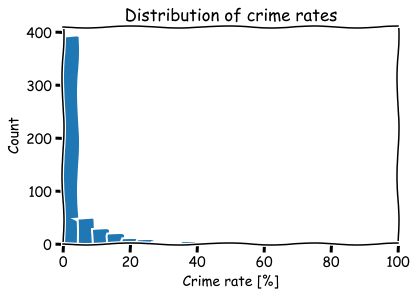

In [9]:
plt.hist(housing_prices["crim"], bins=20)

plt.title("Distribution of crime rates")

plt.xlabel("Crime rate [%]")
plt.ylabel("Count")

plt.xlim(0, 100)

plt.show()

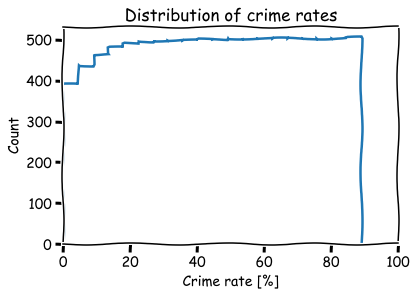

In [10]:
plt.hist(housing_prices["crim"], bins=20, cumulative=True, histtype='step', lw=2.5)

plt.title("Distribution of crime rates")

plt.xlabel("Crime rate [%]")
plt.ylabel("Count")

plt.xlim(0, 100)

plt.show()

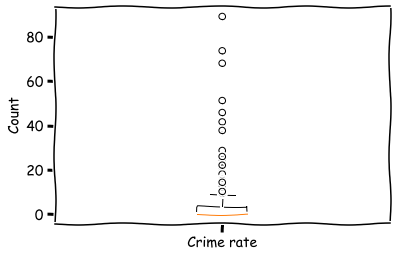

In [11]:
plt.boxplot(housing_prices["crim"])

plt.xticks([1], ["Crime rate"])
plt.ylabel("Count")

plt.show()

In [12]:
housing_prices["crim"].skew()

5.223148798243851

In [13]:
housing_prices["rad"].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [14]:
num_houses_by_accesssbility = housing_prices.groupby("rad").size()

In [15]:
num_houses_by_accesssbility

rad
1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
dtype: int64

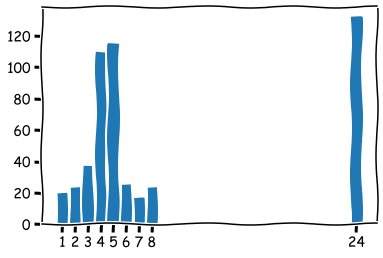

In [16]:
plt.bar(num_houses_by_accesssbility.index, num_houses_by_accesssbility)

# plt.xlim(1, 25)
plt.xticks(list(range(1, 9)) + [24])

plt.show()

In [17]:
prices_by_accessibility = housing_prices.groupby("rad")["medv"].median()

In [18]:
prices_by_accessibility

rad
1     22.20
2     23.85
3     26.50
4     20.45
5     23.00
6     21.20
7     26.20
8     28.25
24    14.40
Name: medv, dtype: float64

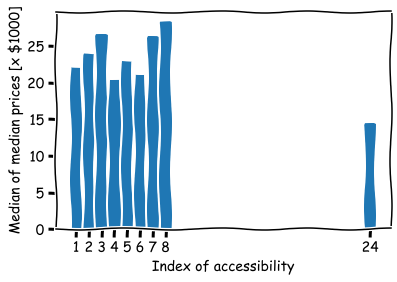

In [19]:
plt.bar(prices_by_accessibility.index, prices_by_accessibility)

# plt.xlim(1, 25)
plt.xticks(list(range(1, 9)) + [24])
plt.xlabel("Index of accessibility")
plt.ylabel("Median of median prices [x $1000]")

plt.show()

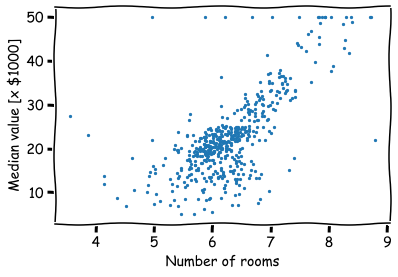

In [20]:
plt.scatter(housing_prices["rm"], housing_prices["medv"], s=5)

plt.xlabel("Number of rooms")
plt.ylabel("Median value [x $1000]")

plt.show()

In [21]:
housing_prices[["rm", "medv"]].corr()

,rm,medv
rm,1.00000,0.69536
medv,0.69536,1.00000


In [22]:
housing_prices[housing_prices.rm.isin(housing_prices.rm.nlargest(5))]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
262,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8
364,3.47428,0.0,18.10,1,0.718,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9


In [23]:
indices_of_outliers = housing_prices[(housing_prices.rm < 6) & (housing_prices.medv < 20)].index

In [24]:
housing_prices_no_outliers = housing_prices.drop(indices_of_outliers)

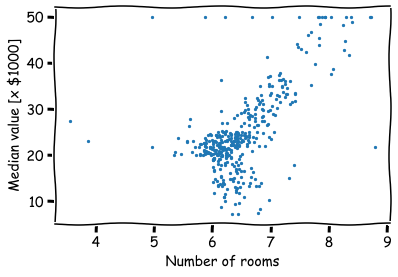

In [25]:
plt.scatter(housing_prices_no_outliers["rm"], housing_prices_no_outliers["medv"], s=5)

plt.xlabel("Number of rooms")
plt.ylabel("Median value [x $1000]")

plt.show()